<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/RCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Scaler/uber-data.csv", dayfirst = True, na_values = 'NaN')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.shape

(6745, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
df['Request timestamp_1'] = pd.to_datetime(df['Request timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Request timestamp_2']=pd.to_datetime(df['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Request timestamp']=df['Request timestamp_2'].combine_first(df['Request timestamp_1'])

In [7]:
df['Drop timestamp_1'] = pd.to_datetime(df['Drop timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Drop timestamp_2']=pd.to_datetime(df['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Drop timestamp']=df['Drop timestamp_2'].combine_first(df['Drop timestamp_1'])

In [8]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2,Drop timestamp_1,Drop timestamp_2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,NaT,2016-07-11 11:51:00,NaT,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,NaT,2016-07-11 17:57:00,NaT,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,NaT,2016-07-12 09:17:00,NaT,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,NaT,2016-07-12 21:08:00,NaT,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13 08:33:16,NaT,2016-07-13 09:25:47,NaT


In [9]:
df.drop(columns =['Request timestamp_1',
'Request timestamp_2', 'Drop timestamp_1', 'Drop timestamp_2'], inplace = True)

In [10]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()/len(df) * 100

,0
Request id,0.000000
Pickup point,0.000000
Driver id,39.288362
Status,0.000000
Request timestamp,0.000000
Drop timestamp,58.028169


Here we can supply issue by seeing driver was not availble for 39% of the time

In [14]:
df['RequestHour'] =df['Request timestamp'].dt.hour

In [16]:
df["TimeSlot"] = df["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))


In [ ]:
df['TimeSlot'] = pd.cut(df['RequestHour'], bins=[0, 5, 10, 15, 24], labels=['Early Morning', 'Noon', 'Late Evening', 'Night'])

In [17]:
df['TimeSlot'].value_counts()

,count
TimeSlot,
Late Evening,2342
Early Morning,2103
Noon,1224
Dawn,578
Night,498


In [18]:
df['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [19]:
df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")

In [20]:
df['Cab Availability'].value_counts()

,count
Cab Availability,
Not Available,3914
Available,2831


Text(0.5, 1.0, 'Frequency of Req by hour')

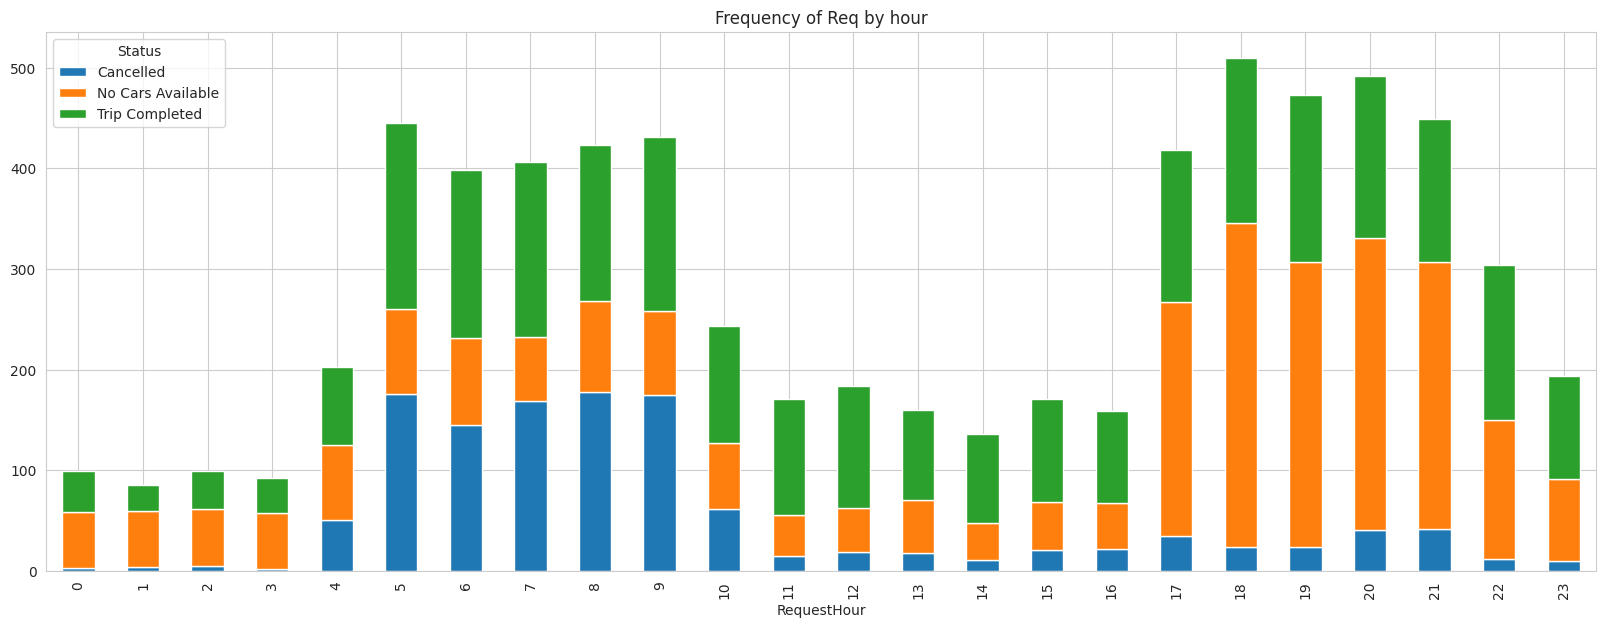

In [21]:
df.groupby(['RequestHour', 'Status']).size().unstack().plot(kind ='bar', stacked = True,figsize =(20,7))
plt.title("Frequency of Req by hour")

In morning, 1 to 3,supply issue is there



Cancellation is happening between 4 to 9



evening demand is issue supply is less

<Axes: >

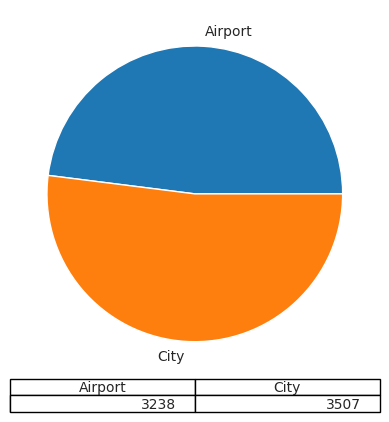

In [22]:
df.groupby(['Pickup point']).size().plot(kind ='pie', stacked = True, table = True)

<Axes: >

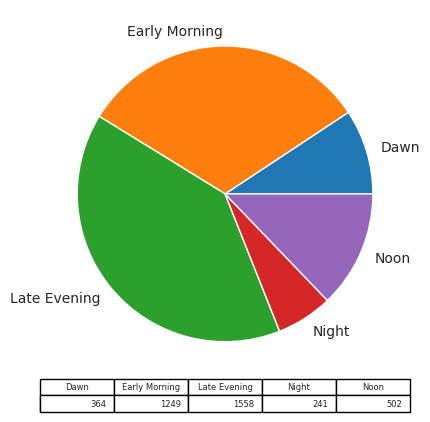

In [23]:
df[df['Cab Availability']== "Not Available"].groupby(['TimeSlot']).size().plot(kind ='pie', stacked = True, table = True)

Text(0.5, 1.0, 'Frequency of Req by hour at the Airport towards City')

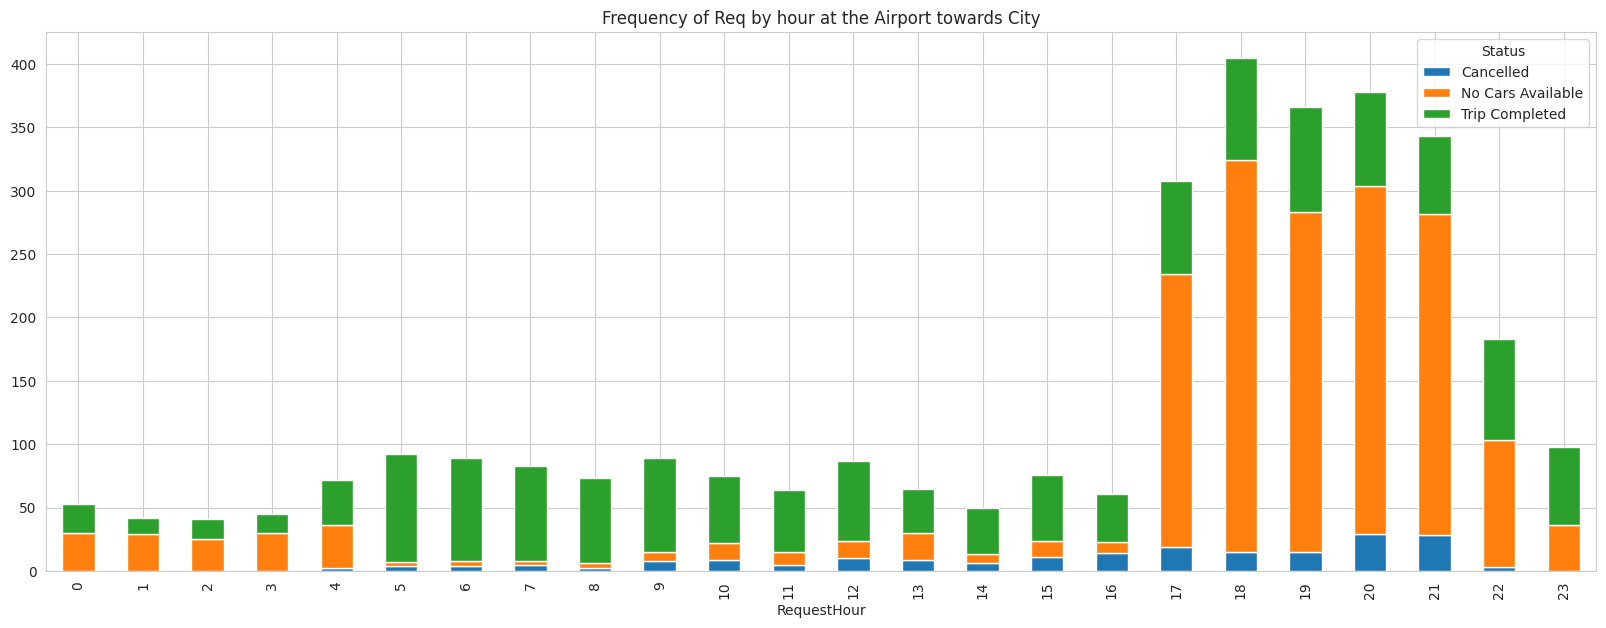

In [24]:
df[df['Pickup point']== 'Airport'].groupby(['RequestHour', 'Status']).size().unstack().plot(kind ='bar', stacked = True,figsize =(20,7))
plt.title("Frequency of Req by hour at the Airport towards City")

There is high demand for driver in vening no cancellation




Text(0.5, 1.0, 'Frequency of Req by hour at city towards Airport')

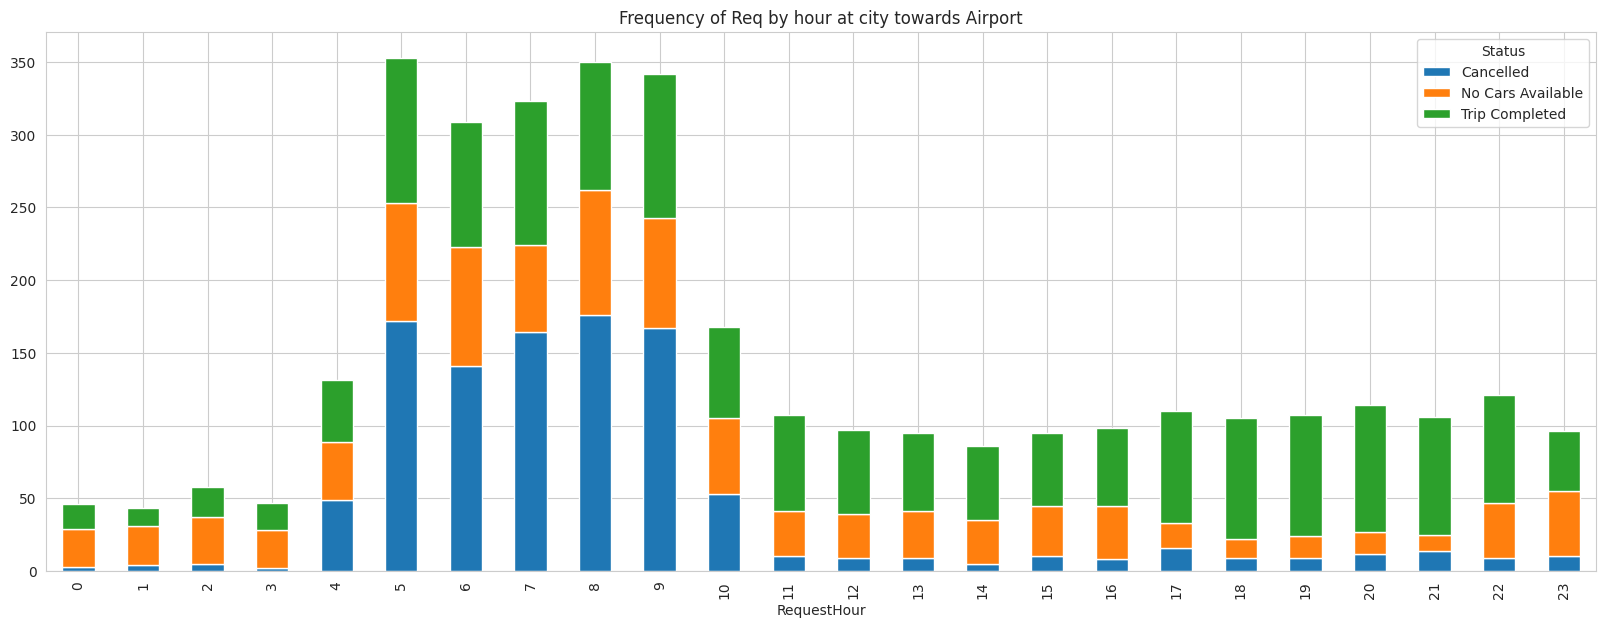

In [25]:
df[df['Pickup point']== 'City'].groupby(['RequestHour', 'Status']).size().unstack().plot(kind ='bar', stacked = True,figsize =(20,7))
plt.title("Frequency of Req by hour at city towards Airport")

High number of cancellations in the monring




How to tackle this demand supply gap




onboard new drivers


extend search in bit part of city



we can make notifications to user to suggest user to make booking early by suggesting coupons, etc...



Give some waiting charges to  drivers


to work with gov to make equal distribution

#**Competitor Analysis**



Amazon vs Flipkart


Where they are present global or aindian market

Pricing offers discounts


UX is better



delivery logistic


customer support



loyalty programs



amazon has audios videos